<a href="https://colab.research.google.com/github/Folskyy/lamia/blob/main/shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.9 MB/s eta 0:00:00


# Importações

In [35]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Processamento

In [36]:
data = load_breast_cancer()

In [37]:
X, y = data['data'], data['target']

In [38]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Classificador

In [40]:
classifier = LinearSVC()

In [41]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [42]:
classifier.score(X_test, y_test)

0.9210526315789473

In [43]:
classifier.predict([X_test[0]])

array([1])

# Shap

Cria um modelo 'SHAP' que gera explicações para as predições do modelo classifier.predict.

In [44]:
explainer = shap.KernelExplainer(classifier.predict, shap.kmeans(X_train, 10))

Esses valores indicam a relevância de cada característica para a predição do modelo

In [45]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

Gráfico que mostra a importância de cada característica na predição feita pelo modelo.

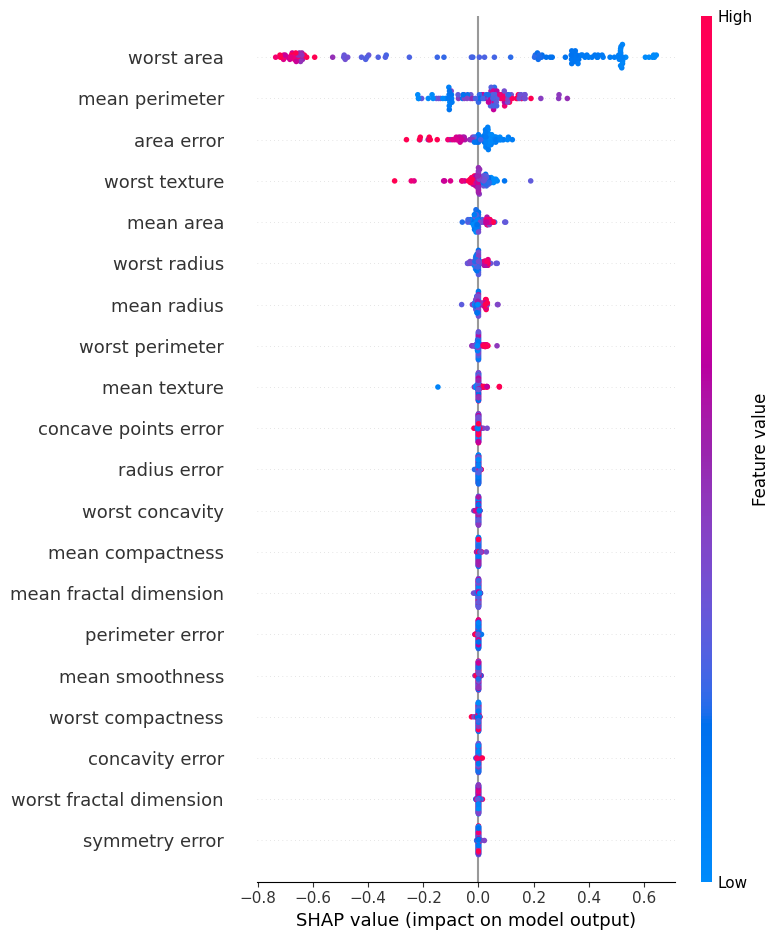

In [23]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

 Visualização interativa, que mostra como cada característica contribuiu para a decisão do modelo em um exemplo.

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names = data['feature_names'])

Média dos valores absolutos dos valores SHAP para cada característica ao longo de todos os exemplos

In [47]:
mean_abs_shap_values = np.abs(shap_values).mean(axis = 0)

In [48]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)

sorted_feature_importances = sorted(feature_importance, key = lambda x: x[1],
                                    reverse = True)

In [49]:
for feature, importance in sorted_feature_importances:
  print(feature,":", importance)

worst area : 0.37828789072737157
mean perimeter : 0.15123728749630846
worst perimeter : 0.11410864442977924
worst texture : 0.03387766835529481
area error : 0.03202649089198267
mean area : 0.01949782975920352
worst radius : 0.017838138196620574
mean radius : 0.010618100643147941
mean texture : 0.009622939058377288
worst concavity : 0.0025710465984788797
mean fractal dimension : 0.0025432062979160864
mean smoothness : 0.0024682432004554822
mean concave points : 0.002423827235415432
radius error : 0.0023467906084390245
fractal dimension error : 0.0022610136605326838
worst compactness : 0.0020608002959793727
worst concave points : 0.0020525697146274086
worst symmetry : 0.0020424248529058555
smoothness error : 0.0020208377515146033
compactness error : 0.0020005128541867195
concavity error : 0.001959471643232438
worst fractal dimension : 0.0019575559396608384
texture error : 0.0018590814417367154
perimeter error : 0.0018471931034628095
concave points error : 0.0018424705973496488
mean symme